# Name  - Himanshu Yadav
## Task-3 Exploratory Data Analysis for retail data
## #GRIPNOV20 Task-3

#### Objective - Analyse given data and figure out why we are facing loss and is that reason specefic .
#### What are the products in which we are facing loss
#### Does loss depend on any other feature like discount / quantity/sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## reading the data 
data = pd.read_csv("SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
##checking for null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#checking for duplicate values
data.duplicated().sum()

17

In [6]:
data.drop_duplicates(inplace = True)

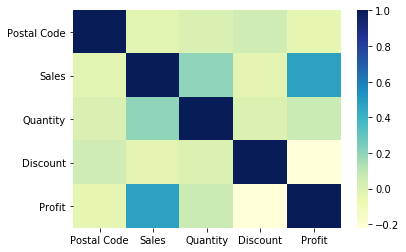

In [7]:
## Looking at the corelation between quantitative features those are postal code , profit,sales,quantity
sns.heatmap(data.corr(),cmap = "YlGnBu")

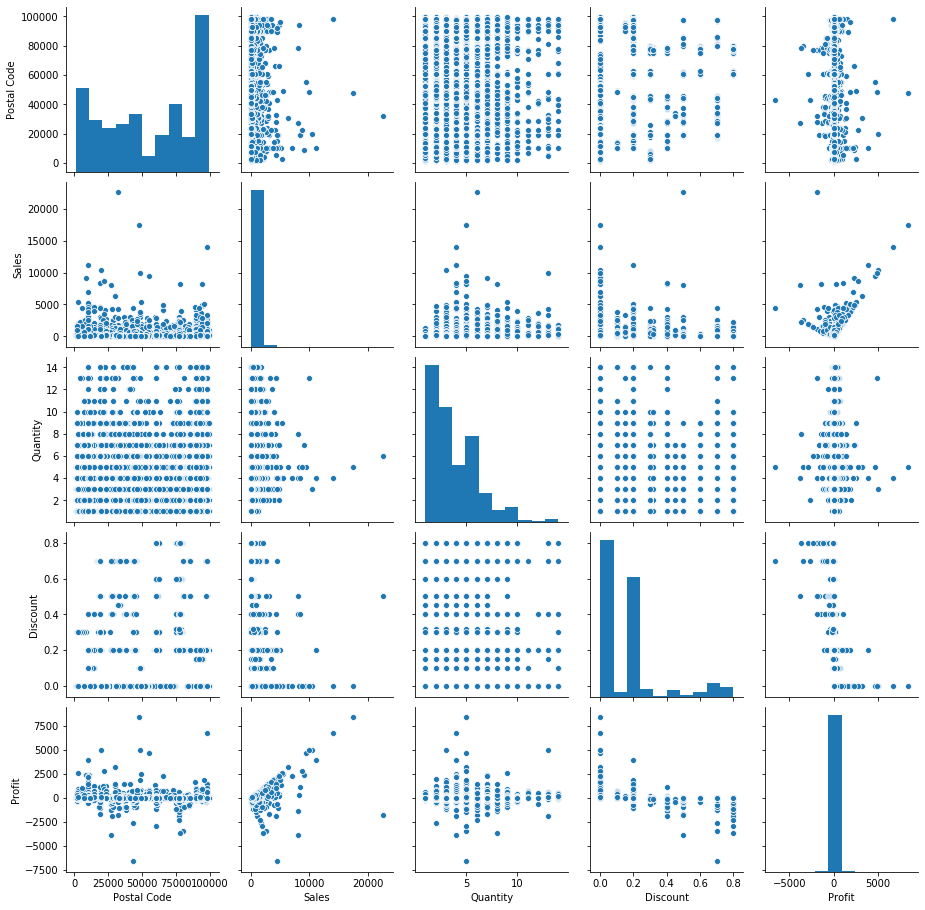

In [8]:
sns.pairplot(data)

## Product Catogeries - 

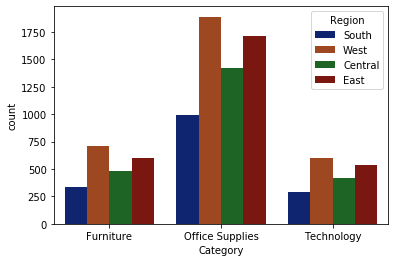

In [9]:
sns.countplot(x = 'Category', hue = 'Region', data = data, palette = 'dark')

### Sub-Categories

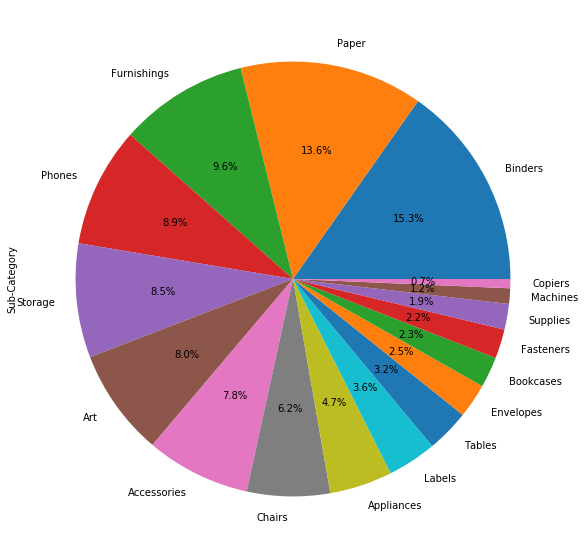

In [10]:
plt.figure(figsize=(15,10))
data['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

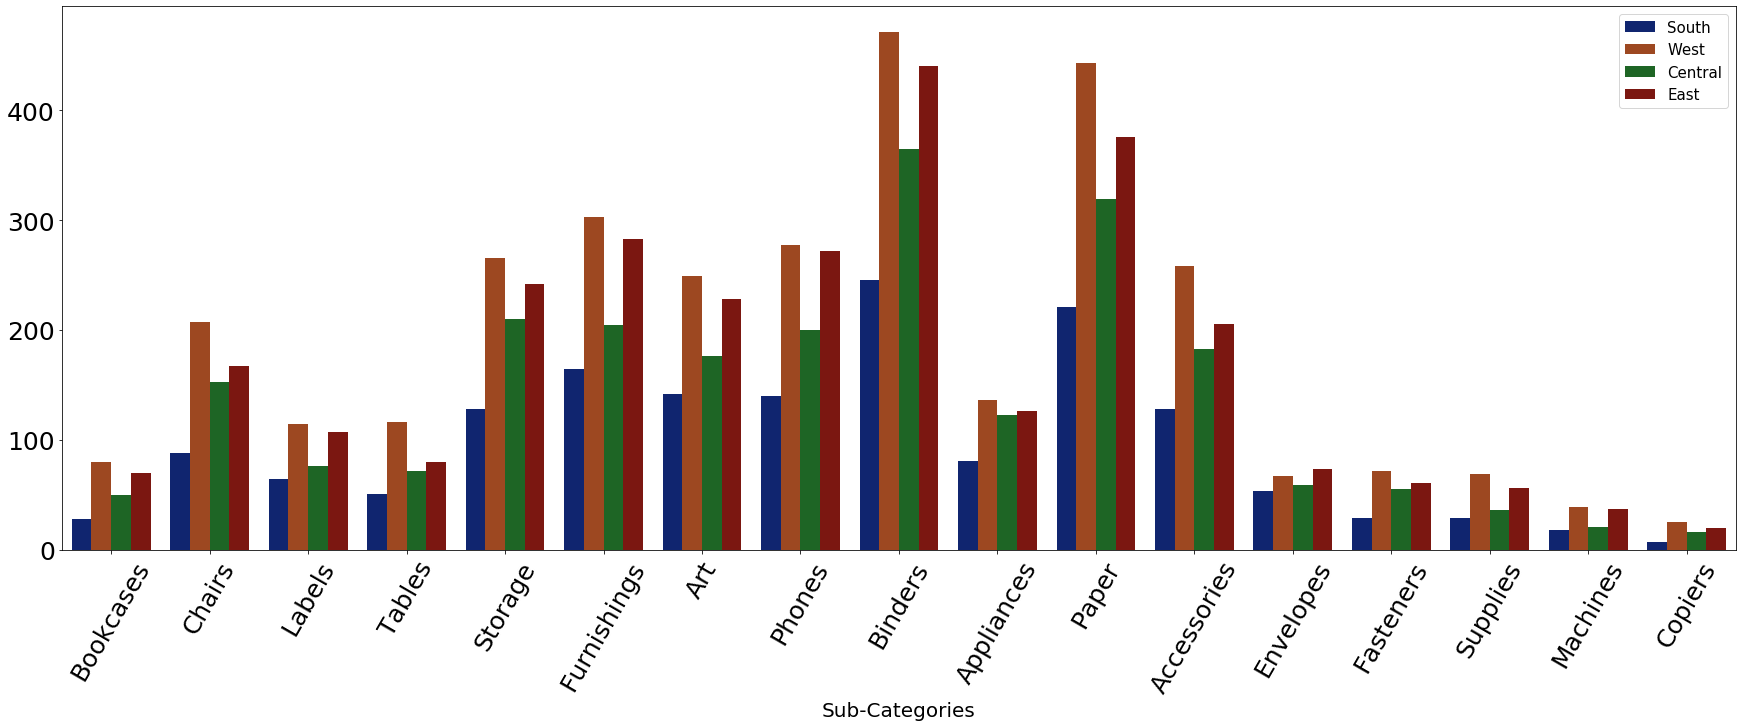

In [11]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'Sub-Category', hue = 'Region', data=data,palette="dark")
plt.xticks(rotation = 60,fontsize = 25)
plt.xlabel('Sub-Categories',fontsize =20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)

## State with higher demand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

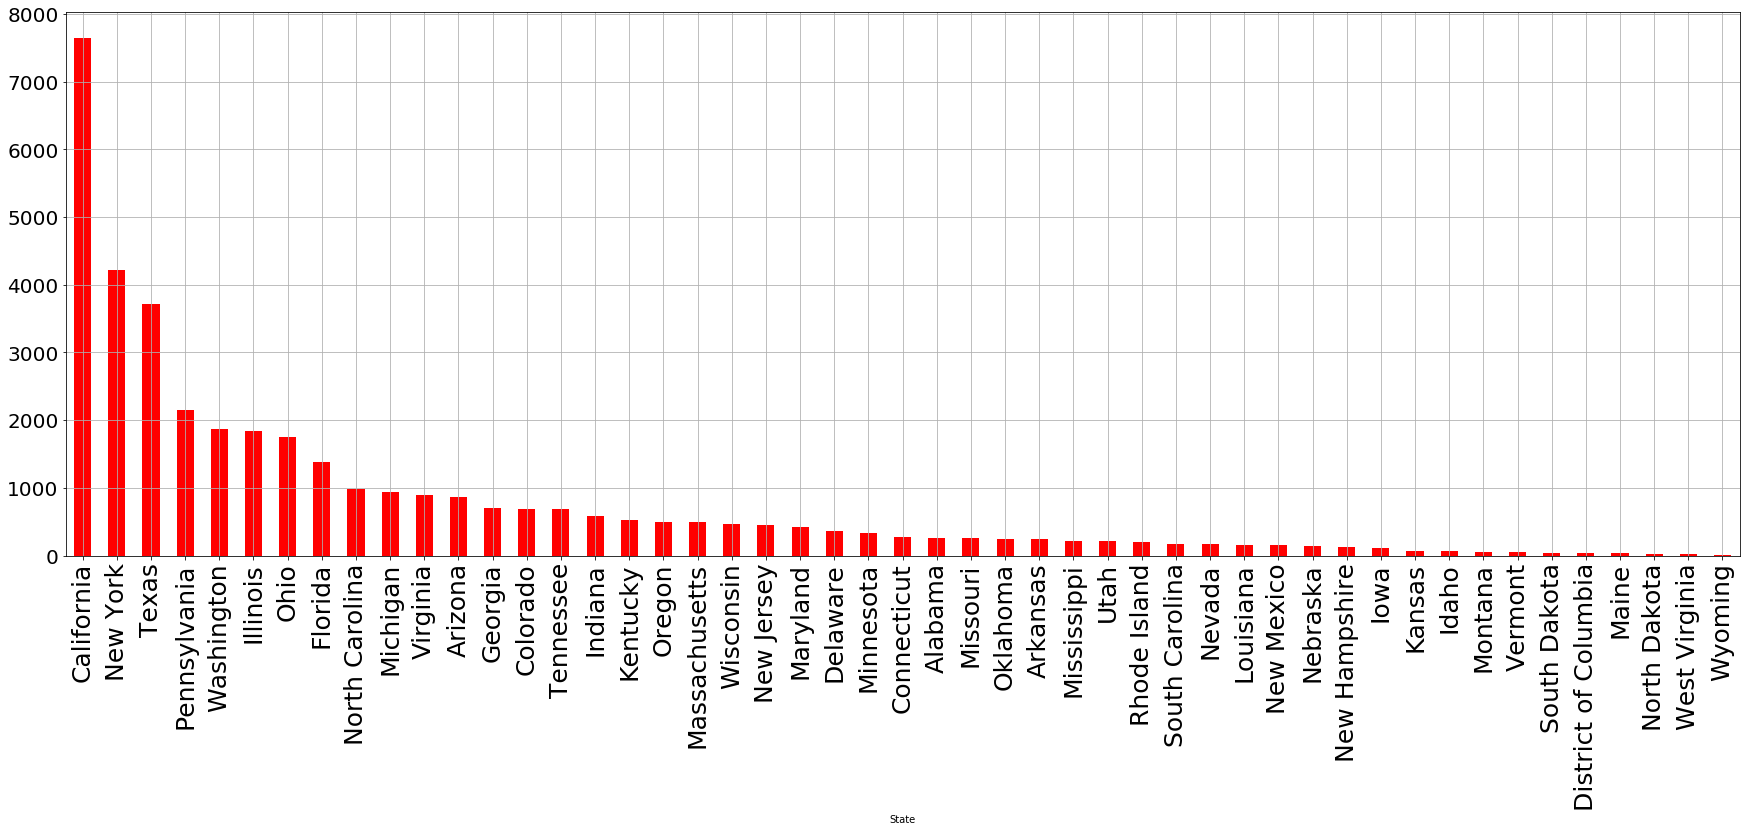

In [12]:
data.groupby('State')['Quantity'].sum().sort_values(ascending=False).plot(kind = 'bar' ,
                                                                          grid = True,
                                                                          figsize = (30,10),
                                                                          fontsize=20,
                                                                          color = 'r')
plt.xticks(fontsize=25)

## state vs profit

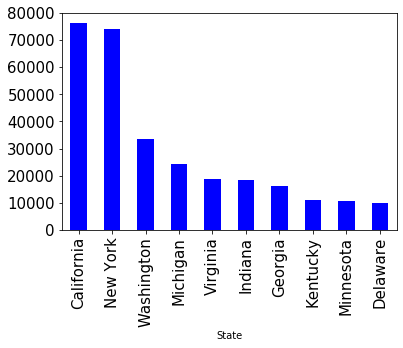

In [13]:
data.groupby('State')['Profit'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar',color = 'b',fontsize =15)

## State with loss or negative profit

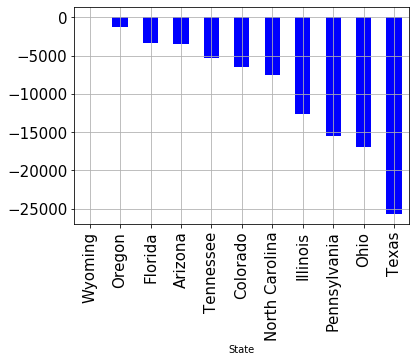

In [17]:
data.groupby('State')['Profit'].sum().sort_values(ascending = False)[-11:].plot(kind = 'bar',
                                                                                grid=True,
                                                                                color = 'b',
                                                                                fontsize =15)

### Profit vs sub -catogery

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

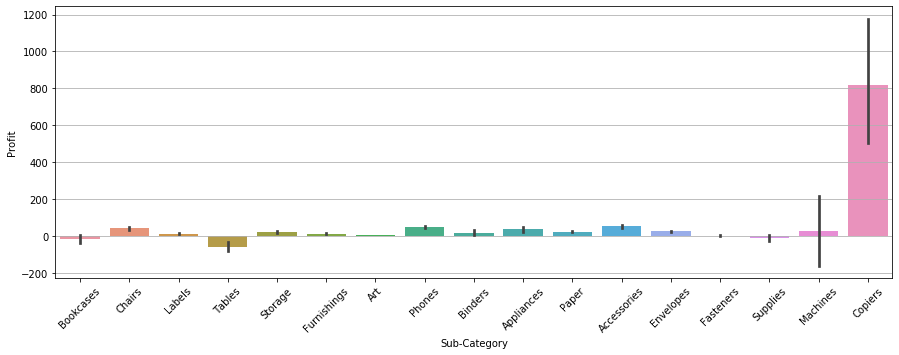

In [15]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.barplot(data['Sub-Category'],data['Profit'])
plt.xticks(rotation=45,fontsize=10)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

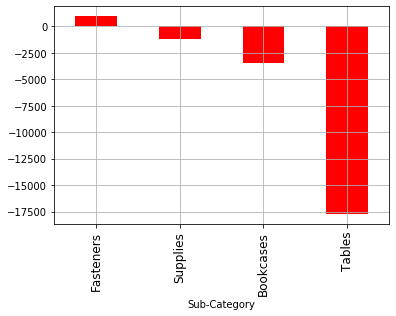

In [16]:
## products with loss
data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)[-4:].plot(kind='bar',
                                                                                   grid=True,
                                                                                   color='r')
plt.xticks(fontsize=12)

### so there are some states in which we are facing some loses 
## three products  are also reason for the loss 